In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
Y = np.array([[0], [1], [1], [0]])
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

In [6]:
class CustomNeuralNetwork(object):
    def __init__(self):
        input_layer_neurons = 2
        hidden_layer_neurons = 10
        output_layer_neurons = 1

        self.learning_rate = 0.05
        self.weights_input_hidden = np.random.randn(input_layer_neurons, hidden_layer_neurons)
        self.weights_hidden_output = np.random.randn(hidden_layer_neurons, output_layer_neurons)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feed_forward(self, X):
        hidden_input = np.dot(X, self.weights_input_hidden)
        self.hidden_output = self.sigmoid(hidden_input)

        output_input = np.dot(self.hidden_output, self.weights_hidden_output)
        prediction = self.sigmoid(output_input)
        return prediction

    def backpropagation(self, X, Y, prediction):
        output_error = Y - prediction
        output_delta = self.learning_rate * output_error * self.sigmoid(prediction, derivative=True)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, derivative=True)

        self.weights_input_hidden += X.T.dot(hidden_delta)
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta)

    def train(self, X, Y):
        prediction = self.feed_forward(X)
        self.backpropagation(X, Y, prediction)

In [7]:
customNN = CustomNeuralNetwork()

error_history = []

for i in range(100000):
    customNN.train(X, Y)
    error = np.mean(np.square(Y - customNN.feed_forward(X)))
    error_history.append(error)

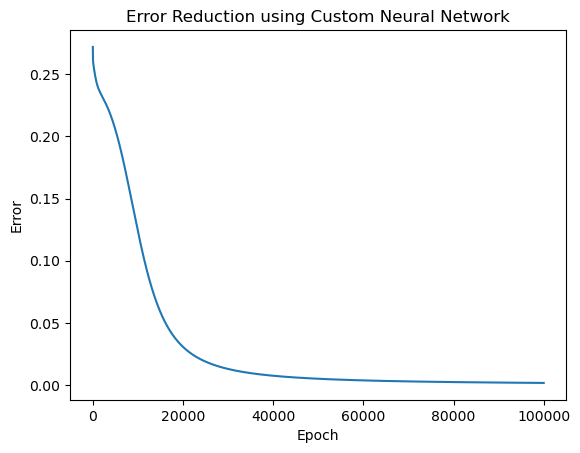

In [8]:
plt.figure()
plt.plot(error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Reduction using Custom Neural Network')
plt.show()